## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #데이터 로드
# import os
# folders = os.listdir('./data/')
# os.chdir('./data/')



In [2]:
#데이터 로드
import os
import glob
folders = glob.glob('./data/*.csv')
# os.chdir('./data/')
folders


['./data\\자동차리콜현황(2020) v3.0.csv',
 './data\\자동차리콜현황(2021).csv',
 './data\\한국교통안전공단_자동차결함 리콜현황_20221231.csv']

In [3]:
# 데이터 병합
df_years = pd.DataFrame()
for files in folders:
    df = pd.read_csv(files, encoding='cp949')
    df_years = pd.concat([df_years, df])

df_years.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [4]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4656 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4656 non-null   object
 1   차명        4656 non-null   object
 2   생산기간(부터)  4656 non-null   object
 3   생산기간(까지)  4656 non-null   object
 4   리콜개시일     4656 non-null   object
 5   리콜사유      4656 non-null   object
dtypes: object(6)
memory usage: 254.6+ KB


In [5]:
# 데이터 중복 여부 및 개수 확인

df_years[df_years.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
1116,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1120,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1521,비엠더블유코리아(주),BMW 320d,2016-06-20,2020-07-31,2021-11-01,BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생...
...,...,...,...,...,...,...
790,비엠더블유코리아(주),530d,2016-10-27,2018-09-05,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [6]:
# 데이터 중복 처리(삭제)
print("Before:", len(df_years))
df_years = df_years.drop_duplicates()
print("After:", len(df_years))


Before: 4656
After: 4498


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [14]:
tmp = df_years.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
tmp.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


In [15]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

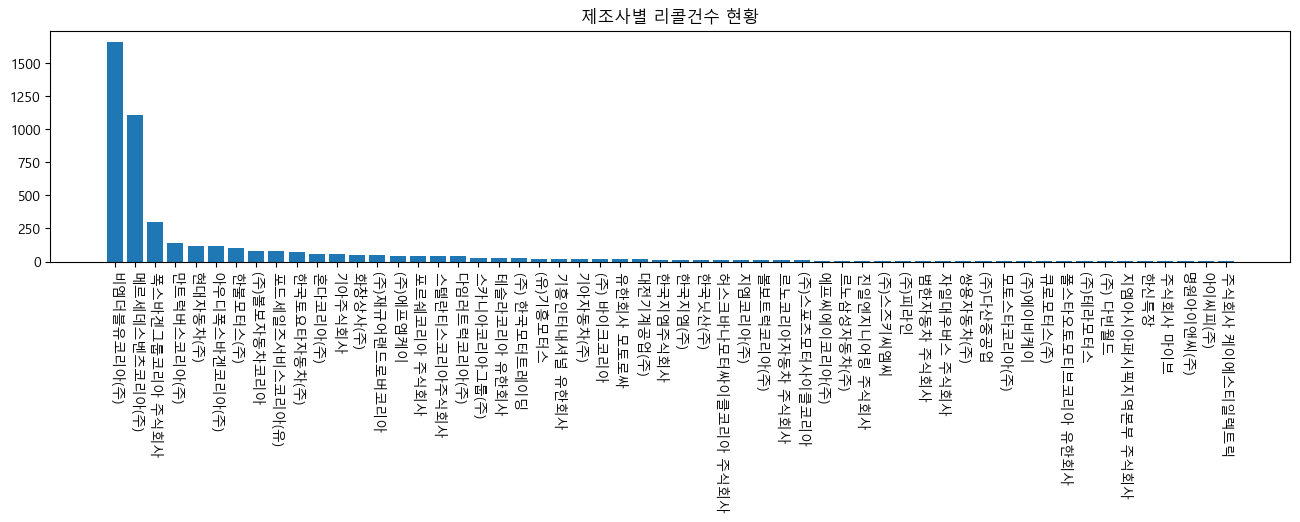

In [17]:
x = tmp.index
y = tmp['count']

plt.figure(figsize=(16,3))   # 스케치북 
plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=270)    # x축 이름 회전
plt.title('제조사별 리콜건수 현황')    # 차트 제목
plt.show()                  # 출력

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [20]:
df_years['생산기간(부터)'] = pd.to_datetime(df_years['생산기간(부터)'])
df_years['생산기간(까지)'] = pd.to_datetime(df_years['생산기간(까지)'])
df_years['리콜개시일'] = pd.to_datetime(df_years['리콜개시일'])

df_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4498 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   제작자       4498 non-null   object        
 1   차명        4498 non-null   object        
 2   생산기간(부터)  4498 non-null   datetime64[ns]
 3   생산기간(까지)  4498 non-null   datetime64[ns]
 4   리콜개시일     4498 non-null   datetime64[ns]
 5   리콜사유      4498 non-null   object        
dtypes: datetime64[ns](3), object(3)
memory usage: 246.0+ KB


In [36]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
df_years['사용기간'] = df_years['리콜개시일'] - df_years['생산기간(까지)']

df_years.sort_values(by=['사용기간'], ascending=False).head()


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
1020,폭스바겐그룹코리아 주식회사,A8 2.8 quat.,1997-08-19,1997-09-09,2021-08-03,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",8729 days
1016,폭스바겐그룹코리아 주식회사,A6 2.4,1997-06-04,1997-11-06,2021-08-03,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",8671 days
1017,폭스바겐그룹코리아 주식회사,A4 1.8,1997-08-26,1998-10-09,2021-08-03,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",8334 days
843,비엠더블유코리아(주),318i,1998-11-13,1999-06-22,2021-06-25,리콜 과정에서 에어백 교체 차량에서 회수한 에어백 인플레이터*를 해당 에어백의 제조...,8039 days
1018,폭스바겐그룹코리아 주식회사,A8 4.2 quat.,2000-03-10,2000-03-10,2021-08-03,"특정 기간 내 특정 업체에서 생산된 운전석 에어백 유닛의 기밀성 불량으로 인하여, ...",7816 days


In [40]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
tmp2 = df_years.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame('days')
tmp2.head(10)

,days
제작자,
한신특장,3349 days 00:00:00
한국닛산(주),2501 days 11:04:36.923076928
비엠더블유코리아(주),2023 days 07:46:41.927710848
아이씨피(주),1902 days 00:00:00
(주)다산중공업,1665 days 00:00:00
한국지엠주식회사,1626 days 04:48:00
(주)에프엠케이,1466 days 01:36:00
지엠아시아퍼시픽지역본부 주식회사,1247 days 00:00:00
진일엔지니어링 주식회사,1201 days 20:00:00


In [41]:
tmp2.tail(10)

,days
제작자,
르노코리아자동차 주식회사,374 days 15:00:00
(주)스포츠모터사이클코리아,348 days 21:00:00
볼보트럭코리아(주),332 days 07:12:00
대전기계공업(주),328 days 04:30:00
(주) 바이크코리아,269 days 15:31:45.882352940
범한자동차 주식회사,261 days 18:00:00
(유)기흥모터스,254 days 22:51:25.714285716
명원아이앤씨(주),128 days 00:00:00
주식회사 케이에스티일렉트릭,113 days 00:00:00


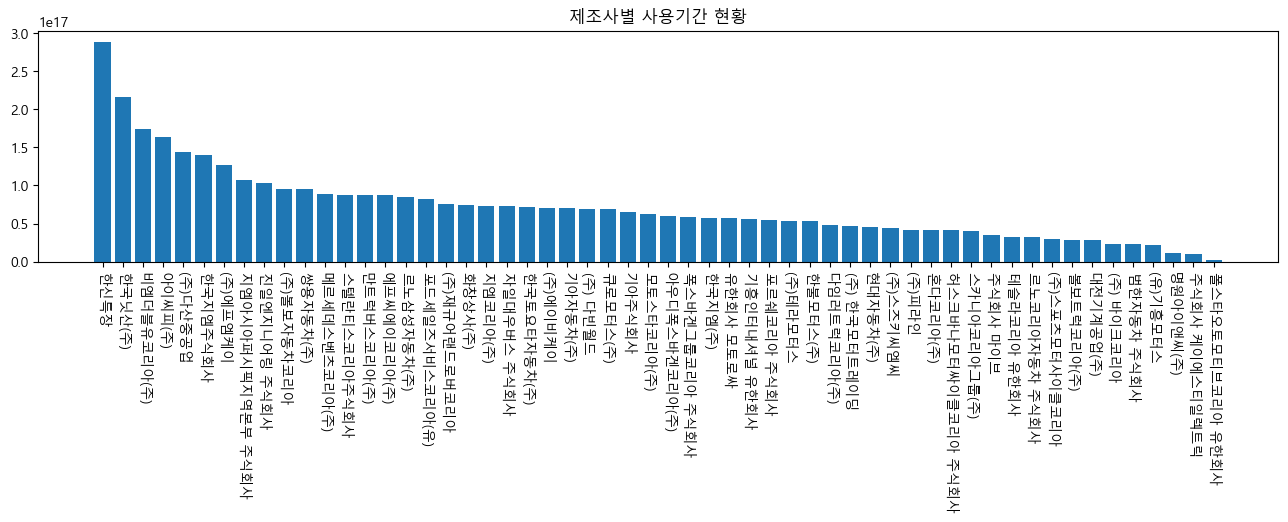

In [39]:
x = tmp2.index
y = tmp2['days']

plt.figure(figsize=(16,3))   # 스케치북 
plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=270)    # x축 이름 회전
plt.title('제조사별 사용기간 현황')    # 차트 제목
plt.show() 

```
사용기간 
Best(10): 한신특장, 한국닛산(주), 비엠더블유코리아(주), 아이씨피(주), (주)다산중공업, 한국지엠주식회사, (주)에프엠케이, 지엠아시아퍼시픽지역본부 주식회사, 진일엔지니어링 주식회사, (주)볼보자동차코리아

Worst(10): 폴스타오토모티브코리아 유한회사, 주식회사 케이에스티일렉트릭, 명원아이앤씨(주), (유)기흥모터스, 범한자동차 주식회사, (주)바이크코리아, 대전기계공업(주), 볼보트럭코리아(주), (주)스포츠모터사이클코리아, 르노코리아자동차 주식회사	
```

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐




<Figure size 800x400 with 0 Axes>

```
문제:그나마 튼튼 제조사 top 3는?
답: 한신특장, 한국닛산(주), 비엔더블유코리아(주)
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [8]:
# 리콜건수가 가장 많은 제조사는?
tmp = df_years.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
tmp.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


In [9]:
# 리콜 사유는?
tmp.index[0]
cond = df_years['제작자'] == tmp.index[0]
tmp3 = df_years.loc[cond]
tmp3.groupby('리콜사유').size().sort_values(ascending=False).to_frame('count')


,count
리콜사유,
"BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생산된 BMW 118d, 120d, 220d, 320d, 323d, 328d, 420d, 435d, 518d, 520d, 525d, 530d, 535d, 630d, 640d, 730d, 730Ld, 740d, 740Ld,750Ld, 840d, M550d, X1, X3, X4, X4 M40d, X5, X5 M50d, X6, X6 M50d, X7 모델 중 일부 차량에서 극히 드문 경우, 배기가스재순환장치(EGR) 쿨러의 제작결함이 발견 되었습니다.",299
"당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 되었음을 입증하였습니다. 당사의 철학과 경영 정책에 따라, 개별 현장 사례의 분석을 계속하였습니다. 그 결과, 지속적인 노력을 통해 상황이 개선되었음에도, 현장에서 적은 수이기는 하나 EGR 쿨러의 누수가 의심되는 사례를 관찰하게 되었습니다. 이에 고객의 이익과 편의를 충실히 보호하고, 동시에 당사에 매우 중요한 한국 시장을 보호하기 위하여, 현장의 적은 수이기는 하나 이러한 의심 사례를 대처하고 해소하기 위한 예방적인 조치를 취하기로 결정하였습니다. 중요한 점으로서, 당사는 귀 기관과 자동차안전연구원에 모든 것을 투명하게 공개하며, 위와 같은 상황을 명확히 전달 드려왔고, 귀 기관 및 자동차안전연구원과의 충분한 논의를 거친 후, 이번 리콜을 시행하기로 결정하였다는 점을 말씀드립니다.",239
배기가스재순환장치 쿨러 내부 냉각수 누설 가능성,201
"블로우바이히터 조립 공정 중, 블로우바이히터 PTC(Positive temperature coefficient) 발열체*와 구리관 사이가 벌어진 상태로 조립되었을 가능성이 발견되었습니다.",90
"BMW 자체 품질 조사 결과 2007년 11월 13일부터 2015년 5월 29일까지 생산된 BMW 520d 등 56개모델의 일부 차량에서 타이밍체인①과 관련한 제작결함이 발견 되었습니다. 사용시간 경과에 따라 타이밍체인의 늘어남은 발생할 수 있으나 타이밍체인 텐셔너가 장력을 유지시켜줍니다. 다만, 주행 조건(극심한 정체, 짧은 주행거리 등)에 따른 DPF(디젤미립자필터)의 재생 빈도와 수준 등의 영향으로 연료(경유)가 엔진오일과 희석될 수 있습니다.",56
...,...
경음기 체결 볼트의 설계상 오류로 경음기가 차체에 제대로 고정되지 아니하여 경음기가 차체에서 이탈될 수 있는 가능성이 있습니다.,1
에어백 컨트롤 유닛 내 액티브 보행자 보호장치 소프트웨어 오류가 발견되었습니다.,1
대쉬보드를 생산하는 과정에서의 생산오류로 동반자석 에어백 고정 나사가 일부 체결되어있지 않았을 가능성이 있습니다.,1


In [6]:
tmp3['리콜사유'].values

array(['2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다.',
       '2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다.',
       '차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다.',
       ...,
       '배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모듈(SME): 고전압 배터리의 전력의 흐름을 조정 및 제어하며, 상태를 감시합니다. (충전 상태 및 배터리 상태)',
       '배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모듈(SME): 고전압 배터리의 전력의 흐름을 조정 및 제어하며, 상태를 감시합니다. (충전 상태 및 배터리 상태)',
       '배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모듈(SME): 고전압 배터리의 전력의 흐름을 조정 및 제어하며, 상태를 감시합니다. (충전 상태 및 배터리 상태)'],
      dtype=object)

In [9]:

caselist = tmp3['리콜사유'].values
text = ' '.join(caselist)
type(text)
print(text)

2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다. 2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다. 차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다. 차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다. 차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다. 차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다. 차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다. 차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진체가 변형되어 에어백 전개 시 인플레이터의 과도한 폭발 압력으로 에어백이 전개될 수 있습니다. 차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 추진

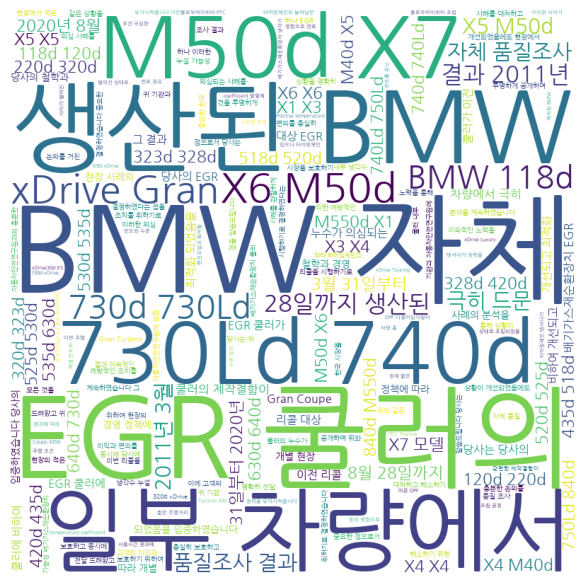

In [10]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)

# plt.rc('font', family='Malgun Gothic')
font_path = './NanumGothic.ttf'

spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

caselist = tmp3['리콜사유'].values
text = ' '.join(caselist)
len(text)

wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 6))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()


In [ ]:
# 주요 원인이 포함된 이유 상세 보기


In [ ]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?


```
리콜 주요 원인은? 

그래서, 가장 나쁜 모델은? 

```